<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/deteccion_de_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etiquetas detectadas: {np.int64(0), np.int64(-1)}
Total de anomalías detectadas (label = -1): 30


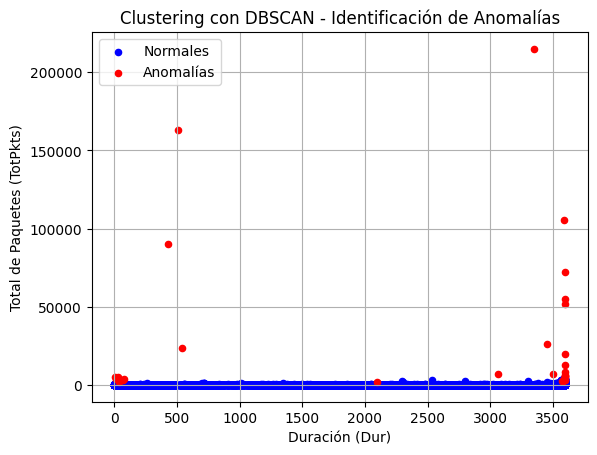

In [23]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

df = pd.read_csv("hello_1.csv", usecols=['Dur', 'TotPkts', 'TotBytes', 'SrcBytes'], nrows=30000)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Instanciar el modelo DBSCAN con parámetros básicos
modelo = DBSCAN(eps=0.5, min_samples=5)

#  Ajustar el modelo a los datos escalados
etiquetas = modelo.fit_predict(X_scaled)

# Paso 5: Añadir las etiquetas como una nueva columna al DataFrame
df['Cluster'] = etiquetas

# Paso 6: Mostrar información básica del resultado
print("Etiquetas detectadas:", set(etiquetas))
print("Total de anomalías detectadas (label = -1):", (etiquetas == -1).sum())

# Separar puntos normales y anómalos
normales = df[df['Cluster'] != -1]
anomalias = df[df['Cluster'] == -1]

# Graficar
plt.scatter(normales['Dur'], normales['TotPkts'], c='blue', label='Normales', s=20)
plt.scatter(anomalias['Dur'], anomalias['TotPkts'], c='red', label='Anomalías', s=20)

plt.xlabel("Duración (Dur)")
plt.ylabel("Total de Paquetes (TotPkts)")
plt.title("Clustering con DBSCAN - Identificación de Anomalías")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Mostrar solo las anomalías detectadas por DBSCAN
anomalías = df[df['Cluster'] == -1]

# Ver las primeras filas
print(anomalías.head())
anomalías.to_csv("anomalías_detectadas.csv", index=False)


             Dur  TotPkts   TotBytes   SrcBytes  Cluster
113  3599.972412    72157   61638544   60214264       -1
116    37.925823     1921    2636496    2625276       -1
123   507.347626   162760  137136528  132816366       -1
136   536.390381    23574   10855048   10056796       -1
165  3599.976562     8223    1119577     448464       -1


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, classification_report

# 1. Cargar solo 30,000 filas
df = pd.read_csv("hello_1.csv",nrows=30000)

# 2. Limpiar nombres de columnas por si tienen espacios o saltos
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\r', '').str.lower()
# 3. Verificar que las columnas existen
required_columns = ['dur', 'totpkts', 'totbytes', 'srcbytes']
if not all(col in df.columns for col in required_columns):
    raise ValueError("Una o más columnas no se encontraron en el archivo CSV")

# 4. Seleccionar y escalar
X = df[required_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Aplicar DBSCAN
modelo = DBSCAN(eps=0.5, min_samples=5)
df['pred_cluster'] = modelo.fit_predict(X_scaled)

# 6. Etiqueta real: 1 = ataque, 0 = normal
df['real_label'] = df['label'].apply(lambda x: 1 if 'attack' in str(x).lower() or 'malicious' in str(x).lower() else 0)

# 7. Etiqueta predicha: -1 es anomalía
df['pred_label'] = df['pred_cluster'].apply(lambda x: 1 if x == -1 else 0)

# 8. Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(df['real_label'], df['pred_label']))

print("\nReporte de clasificación:")
print(classification_report(df['real_label'], df['pred_label']))


Matriz de confusión:
[[29970    30]
 [    0     0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.00      0.00      0.00         0

    accuracy                           1.00     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       1.00      1.00      1.00     30000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
